# 思路二：从总体中抽取5000个样本，重复500次，再分别进行回归

## 一、查看数据

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\giao\Desktop\作业\抽样技术\diamonds.csv")

In [3]:
dataset.head()

,price,carat,cut,color,clarity,x,y,z
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,4.34,4.35,2.75


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


In [5]:
from time import time
import sys
sys.setrecursionlimit(20000)

#define
m = 2**32
a = 1103515245
c = 12345
rdls = []

def LCG(seed,mi,ma,n):
    if n == 0:
        return rdls
    else:
        seed = (a * seed + c) % m
        rdls.append(int((ma-mi)*seed/float(m-1)) + mi)
        n = n-1
        LCG(seed,mi,ma,n)

In [6]:
tota_number = list(dataset.index)
def main():
    seed=time()
    mi=min(tota_number[:])
    ma=max(tota_number[:])
    n=500
    LCG(seed,mi,ma,n)
    return rdls

In [30]:
len(main())

12000

## 二、 进行无放回简单随机抽样，抽取500个样本容量为5000的样本

In [15]:
def SRSWOR(dataset,k=50):
    #tota_number = list(dataset.index)
    ans = []
    for _ in range(k):
            sample = main()
            ans.append (dataset.iloc[sample])
        
    return ans

In [16]:
samples = SRSWOR(dataset)
print(samples)

[       price  carat        cut color clarity     x     y     z
2044     561   0.32    Premium     H     VS1  4.33  4.38  2.67
15394   6167   1.20  Very Good     I     VS1  6.78  6.74  4.22
5524    3852   1.01       Good     G     SI2  6.31  6.35  4.03
9767    4662   1.06      Ideal     G     SI2  6.61  6.56  4.02
20744   8982   1.05      Ideal     E    VVS2  6.49  6.52  4.06
...      ...    ...        ...   ...     ...   ...   ...   ...
7654    4269   1.00  Very Good     F     SI2  6.26  6.29  3.97
13162   5443   1.20  Very Good     H     SI1  6.69  6.73  4.26
5501    3845   0.74      Ideal     F     VS1  5.79  5.87  3.60
33381    827   0.41    Premium     G     VS2  4.75  4.79  2.93
53521   2688   0.82    Premium     F     SI2  6.13  6.08  3.63

[1000 rows x 8 columns],        price  carat        cut color clarity     x     y     z
2044     561   0.32    Premium     H     VS1  4.33  4.38  2.67
15394   6167   1.20  Very Good     I     VS1  6.78  6.74  4.22
5524    3852   1.01       Go

## 三、进行回归，输出β

In [17]:
betas = []
count= 0
for dataset in samples:
    x = dataset.iloc[:,[1]]
    y = dataset.iloc[:,[0]]
    model = linear_model.LinearRegression()
    model.fit(x,y)
    beta = model.coef_[0]
    count+=1
    betas.append(beta)

In [18]:
print(count)

50


In [20]:
print(x)

       carat
2044    0.32
15394   1.20
5524    1.01
9767    1.06
20744   1.05
...      ...
22495   1.29
40677   0.50
28591   0.30
28531   0.33
10497   1.02

[25500 rows x 1 columns]


In [21]:
print(y)

       price
2044     561
15394   6167
5524    3852
9767    4662
20744   8982
...      ...
22495  10530
40677   1155
28591    675
28531    675
10497   4798

[25500 rows x 1 columns]


In [22]:
print(betas)

[array([7862.8569461]), array([7885.41232509]), array([7773.32440077]), array([7670.32218907]), array([7740.86387179]), array([7680.93048158]), array([7674.99156137]), array([7719.44059094]), array([7724.96957772]), array([7757.57000557]), array([7753.23995905]), array([7748.94807757]), array([7738.82422449]), array([7753.83940128]), array([7770.12995443]), array([7798.46481212]), array([7811.90910702]), array([7815.15455946]), array([7821.85304623]), array([7821.17899235]), array([7815.66784148]), array([7818.0286777]), array([7823.69919972]), array([7836.36976824]), array([7828.15450524]), array([7834.30570767]), array([7825.19238901]), array([7839.48121869]), array([7844.2229036]), array([7831.86518355]), array([7831.26181426]), array([7825.50514838]), array([7830.53521958]), array([7830.07360574]), array([7826.18490387]), array([7815.3495616]), array([7805.35588473]), array([7797.42913307]), array([7801.7328428]), array([7806.31084538]), array([7802.08085018]), array([7800.6467756]

## 计算β方差等数据·

In [13]:
mean = np.mean(betas)
print(mean)
var = np.var(betas)
print(var)

7782.078448879815
968.7011566478311


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
betas = np.array(betas)#调用numpy中的array函数创建数组
betas

array([[7874.24210428],
       [7813.0545206 ],
       [7712.13094256],
       [7740.51758919],
       [7762.53021746],
       [7703.09684833],
       [7741.47742259],
       [7738.70724421],
       [7739.19383687],
       [7716.79218056],
       [7761.07345586],
       [7797.79447599],
       [7780.70996913],
       [7766.10773597],
       [7750.36470654],
       [7736.38166455],
       [7748.98799723],
       [7760.03417664],
       [7770.92498473],
       [7780.71260379],
       [7778.20914105],
       [7799.29480817],
       [7818.69334894],
       [7814.0035072 ],
       [7809.76480103],
       [7803.67813706],
       [7807.67460308],
       [7811.42132856],
       [7822.344065  ],
       [7802.04927147],
       [7783.28466325],
       [7787.68217206],
       [7791.80176003],
       [7790.54053522],
       [7791.8006814 ],
       [7797.3767595 ],
       [7802.63616995],
       [7809.45691336],
       [7799.31244715],
       [7789.71877585],
       [7781.30265066],
       [7792.431

(array([ 3.,  1.,  6.,  5.,  9., 17.,  8.,  0.,  0.,  1.]),
 array([7703.09684833, 7720.21137392, 7737.32589952, 7754.44042511,
        7771.55495071, 7788.6694763 , 7805.7840019 , 7822.8985275 ,
        7840.01305309, 7857.12757869, 7874.24210428]),
 <BarContainer object of 10 artists>)

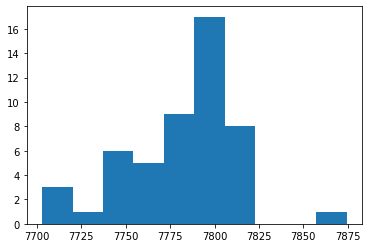

In [16]:
plt.hist(betas)


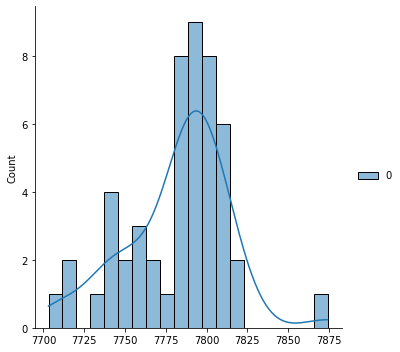

In [17]:
sns.displot(betas,bins=20, kde = True)
